In [87]:
training_data = read.csv("/content/data.csv")

In [88]:
training_data$diagnosis = as.factor(training_data$diagnosis)

In [ ]:
summary(training_data)

In [90]:
class(training_data)

[1] "data.frame"

In [91]:
training_data = training_data[-c(1)]

In [92]:
dim(training_data)

[1] 569  31

In [93]:
m_data = training_data[training_data$diagnosis=='M',]
b_data = training_data[training_data$diagnosis=='B',]

In [94]:
a = dim(m_data)

In [95]:
a

[1] 212  31

In [96]:
training_data_fraction = 0.7
cv_data_fraction = 0.2
testing_data_fraction = 0.1

In [97]:
training_data_len = round(training_data_fraction  * nrow(training_data))
cv_data_len = round(cv_data_fraction * nrow(training_data))
testing_data_len = round(testing_data_fraction * nrow(training_data))

In [98]:
testing_data_len+cv_data_len+training_data_len 

[1] 569

In [99]:
nrow(training_data)

[1] 569

In [100]:
a = training_data[training_data$diagnosis=='B',]
neg_training_data = a[0:round(training_data_len/2),]
dim(neg_training_data)

[1] 199  31

In [101]:
a = training_data[training_data$diagnosis=='M',]
pos_training_data = a[0:round(training_data_len/2),]
dim(pos_training_data)

[1] 199  31

In [102]:
train_data = rbind.data.frame(neg_training_data,pos_training_data)

In [ ]:
train_data

In [104]:
a = training_data[training_data$diagnosis=='B',]
neg_remaining_data = a[round((training_data_len/2)+1):nrow(a),]
dim(neg_remaining_data)

[1] 158  31

In [105]:
nrow(a)

[1] 357

In [106]:
a = training_data[training_data$diagnosis=='M',]
pos_remaining_data = a[round((training_data_len/2)+1):nrow(a),]
dim(pos_remaining_data)

[1] 13 31

In [107]:
remaining_data = rbind.data.frame(neg_remaining_data,pos_remaining_data)

In [108]:
dim(remaining_data)

[1] 171  31

In [109]:
 train_data = train_data[sample(1:nrow(train_data)), ]
 remaining_data = remaining_data[sample(1:nrow(remaining_data)),]

In [ ]:
train_data

In [111]:
cv_data = remaining_data[0:cv_data_len,]
testing_data = remaining_data[cv_data_len:nrow(remaining_data),]

In [112]:
dim(train_data)

[1] 398  31

In [113]:
dim(cv_data)

[1] 114  31

In [114]:
dim(testing_data)

[1] 58 31

In [ ]:
install.packages("party")

In [115]:
library("party")
png(file = "decision_tree.png")
output.tree <- ctree(
  diagnosis ~ .,
  data = train_data)
plot(output.tree)

In [116]:
dev.off()

png 
  3

In [202]:
decision_tree_ans_pred<-predict(output.tree, cv_data)

m_at <- table(cv_data$diagnosis, decision_tree_ans_pred)
m_at

   decision_tree_ans_pred
     B  M
  B 97 10
  M  0  7

In [118]:
save(output.tree, file = '/content/decision_tree_model.rda')

In [212]:
dt_test_pred = predict(output.tree, testing_data)

In [174]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [175]:
library("e1071")

In [192]:
svmfit = svm(train_data$diagnosis ~ ., data = train_data, kernel = "linear", cost = 10, scale = FALSE)

In [193]:
summary(svmfit)


Call:
svm(formula = train_data$diagnosis ~ ., data = train_data, kernel = "linear", 
    cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  32

 ( 16 16 )


Number of Classes:  2 

Levels: 
 B M




In [194]:
svm_ans_pred = predict(svmfit, cv_data)

In [195]:
svm_ans_pred

524 437 481 506 397 532 395 553 411 362 555 519 495 435 372 426 509 496 497 522 
  B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   M 
487 376 449 427 556 444 559 552 474 473 365 516 498 425 412 534 468 467 399 383 
  B   B   M   B   B   B   B   B   B   B   B   B   B   B   B   M   B   M   B   B 
459 460 521 361 400 548 557 539 440 438 560 379 458 540 561 478 465 423 432 526 
  B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B 
421 430 568 441 463 406 448 494 564 477 396 424 551 368 454 407 429 544 563 391 
  B   B   M   B   B   B   B   B   M   M   B   B   B   B   B   B   B   B   M   B 
388 529 514 486 538 456 470 404 377 537 520 485 507 527 503 545 417 501 402 541 
  B   B   B   B   B   M   B   B   B   M   B   B   B   B   B   B   B   B   B   B 
428 375 546 385 535 567 525 505 547 484 464 455 384 492 
  B   B   B   B   B   M   B   B   B   B   B   B   B   M 
Levels: B M

In [213]:
svm_test_pred = predict(svmfit, testing_data)

In [222]:
save(nn, file = '/content/svm.rda')

In [119]:
install.packages("neuralnet")

library("neuralnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [120]:
nn = neuralnet(diagnosis ~ .,data=train_data, hidden=31,act.fct = "logistic",linear.output = FALSE)

In [121]:
plot(nn)

In [ ]:
predict=compute(nn,cv_data)

probab<- predict$net.result
pre <- ifelse(probab>0.5, 1, 0)
pre

In [215]:
nn_test_prob = (compute(nn,testing_data))$net.result
nn_test_pred = ifelse(nn_test_prob>0.5,1,0)

In [ ]:
probab

In [125]:
post = ifelse(cv_data$diagnosis=='B', 1, 0)

In [126]:
n = ifelse(post == 1 , 0 , 1)

In [127]:
post = as.data.frame(post)

In [128]:
post = cbind(post,n)

In [129]:
post = as.matrix(post)

In [130]:
sum(post != pre)

[1] 14

In [131]:
m_at <- table(post, pre)
m_at

    pre
post   0   1
   0 107   7
   1   7 107

In [132]:
summary(nn)

                    Length Class      Mode    
call                    6  -none-     call    
response              796  -none-     logical 
covariate           11940  -none-     numeric 
model.list              2  -none-     list    
err.fct                 1  -none-     function
act.fct                 1  -none-     function
linear.output           1  -none-     logical 
data                   31  data.frame list    
exclude                 0  -none-     NULL    
net.result              1  -none-     list    
weights                 1  -none-     list    
generalized.weights     1  -none-     list    
startweights            1  -none-     list    
result.matrix        1028  -none-     numeric 

In [133]:
save(nn, file = '/content/nn.rda')

In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [134]:
library(pROC)

In [203]:
cv_ans = ifelse(cv_data$diagnosis == 'B',0,1)
cv_ans

test_ans = ifelse(testing_data$diagnosis == 'B',0,1)
test_ans

dtree_ans_pred = ifelse(decision_tree_ans_pred == 'B',0,1)
dtree_ans_pred

nn_ans_pred = ifelse(pre[,1]>pre[,2],0,1)
nn_ans_pred

svmmodel_ans_pred = ifelse(svm_ans_pred == 'B',0,1)
svmmodel_ans_pred

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 [75] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[112] 0 0 0

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0

[1] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0
 [75] 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[112] 0 0 1

524 437 481 506 397 532 395 553 411 362 555 519 495 435 372 426 509 496 497 522 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   1 
487 376 449 427 556 444 559 552 474 473 365 516 498 425 412 534 468 467 399 383 
  0   0   1   0   0   0   0   0   1   1   0   0   0   0   0   1   0   1   0   0 
459 460 521 361 400 548 557 539 440 438 560 379 458 540 561 478 465 423 432 526 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
421 430 568 441 463 406 448 494 564 477 396 424 551 368 454 407 429 544 563 391 
  0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1   0 
388 529 514 486 538 456 470 404 377 537 520 485 507 527 503 545 417 501 402 541 
  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
428 375 546 385 535 567 525 505 547 484 464 455 384 492 
  0   0   0   0   0   1   0   0   0   0   0   0   0   1

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [38] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 [75] 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[112] 0 0 1

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9533

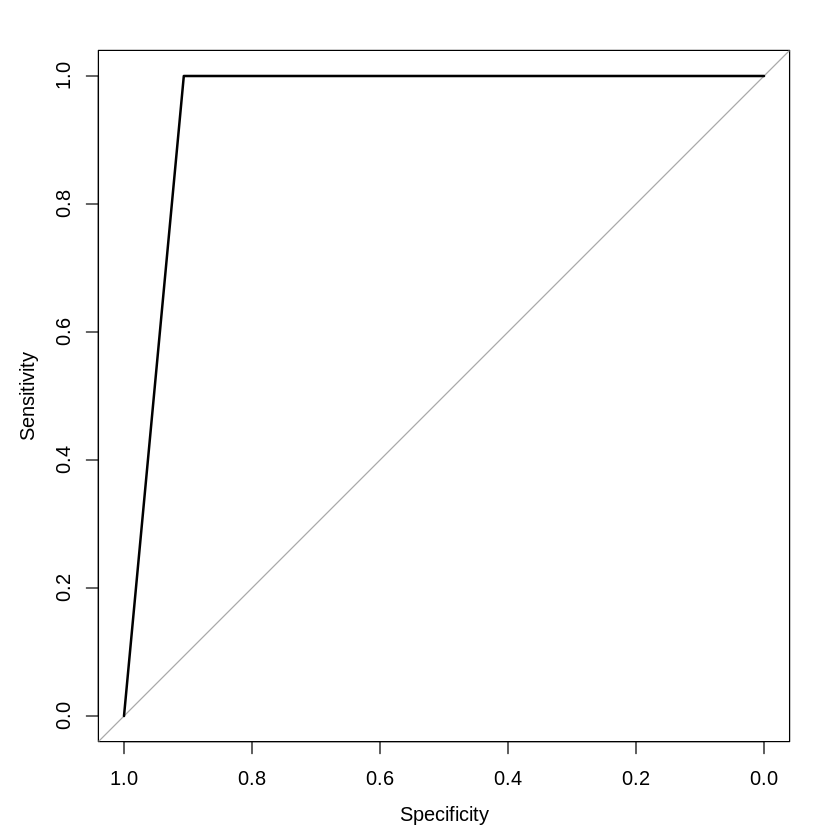

In [209]:
# calculate area under curve

roc_dt <- roc(cv_ans, dtree_ans_pred , plot = TRUE)
auc(roc_dt)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9766

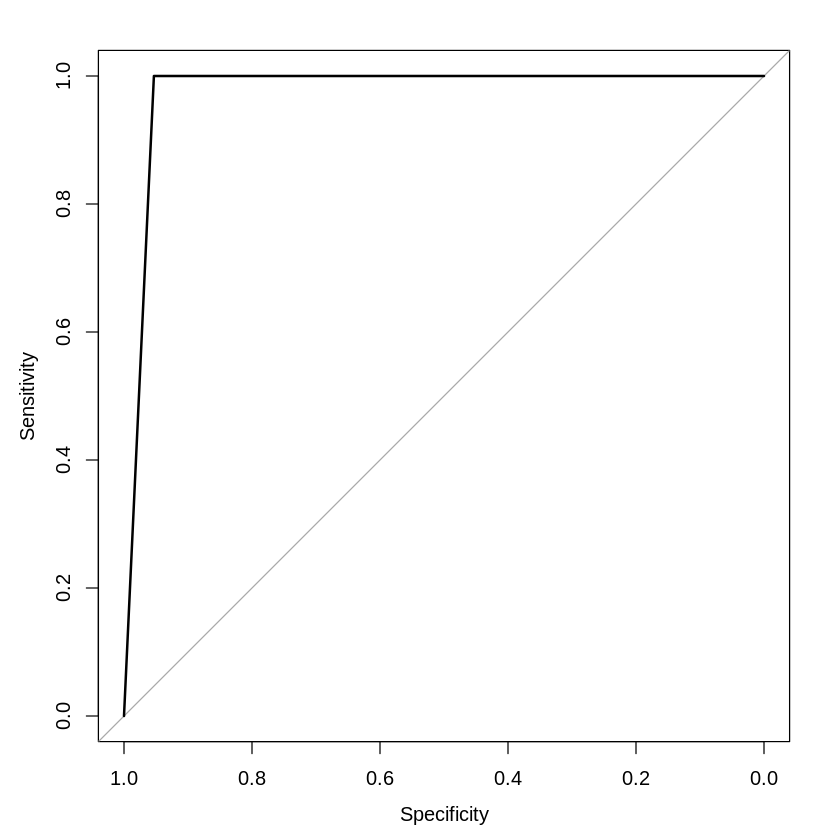

In [210]:
roc_svm <- roc(cv_ans, svmmodel_ans_pred, plot = TRUE)
auc(roc_svm)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9673

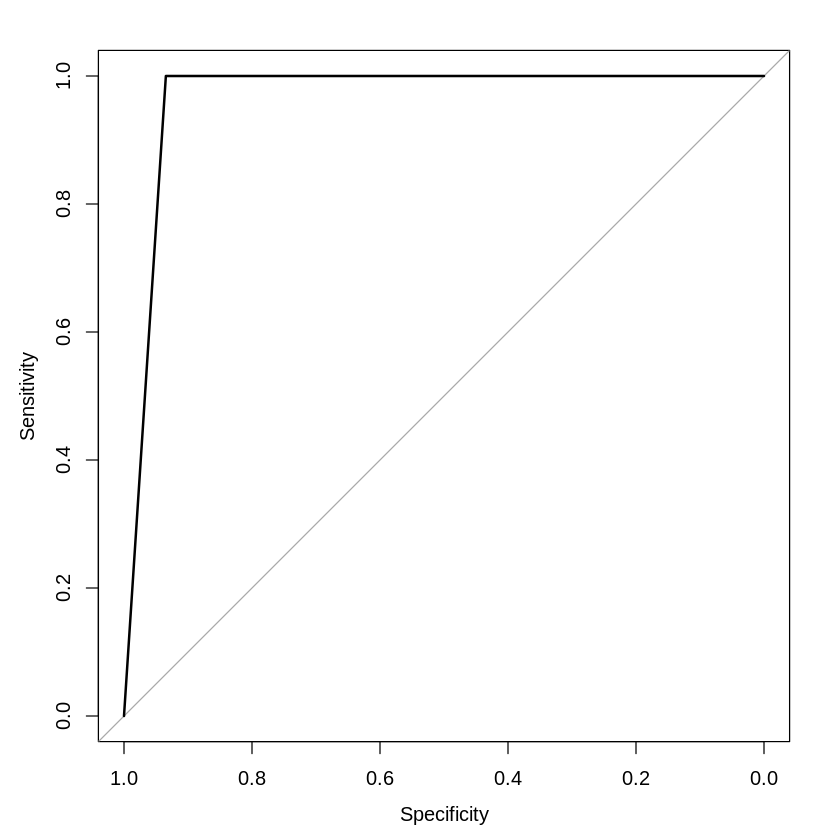

In [211]:
roc_nn <- roc(cv_ans, nn_ans_pred, plot = TRUE)
auc(roc_nn)

In [ ]:
dt_test_pred
svm_test_pred
nn_test_pred

In [217]:
dtree_test_ans_pred = ifelse(dt_test_pred == 'B',0,1)
dtree_test_ans_pred

nn_test_ans_pred = ifelse(nn_test_pred[,1]>nn_test_pred[,2],0,1)
nn_test_ans_pred

svmmodel_test_ans_pred = ifelse(svm_test_pred == 'B',0,1)
svmmodel_test_ans_pred

[1] 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0

492 439 381 419 466 403 528 446 410 549 542 491 471 533 414 517 479 392 558 562 
  1   0   0   0   1   0   0   0   1   0   0   1   0   0   0   1   0   0   0   0 
569 443 550 398 389 453 476 364 531 413 554 515 451 565 408 416 482 363 483 457 
  0   0   1   0   0   0   0   0   0   0   0   1   0   1   0   0   0   0   0   0 
511 387 543 530 523 472 420 475 378 512 508 518 489 405 566 536 382 422 
  0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   1   0   0

[1] 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
[39] 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9615

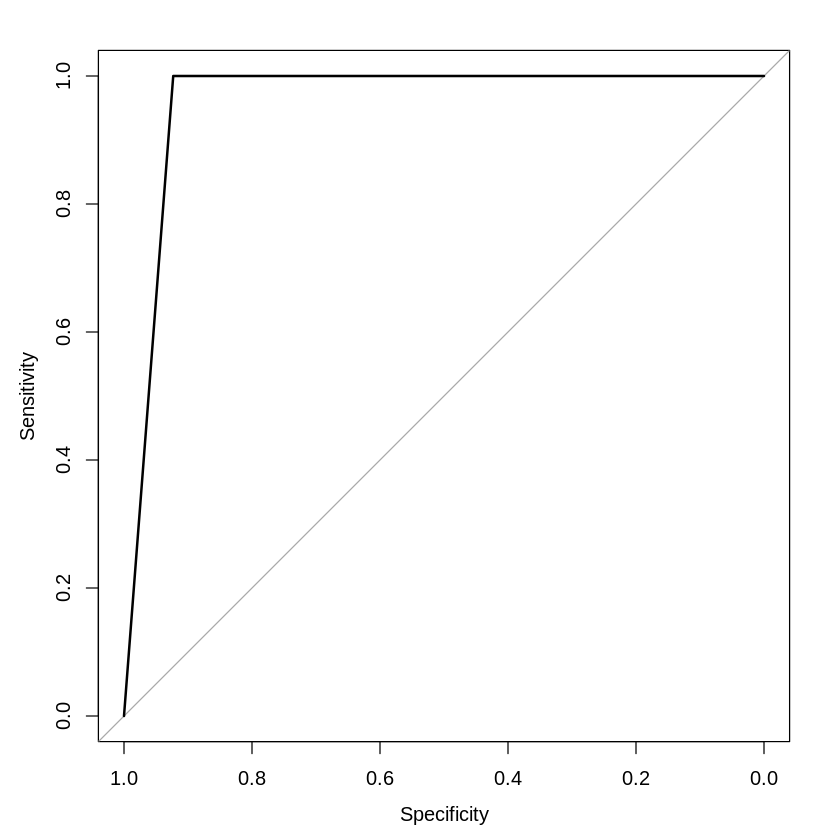

In [218]:
# calculate area under curve

roc_dt_test <- roc(test_ans, dtree_test_ans_pred , plot = TRUE)
auc(roc_dt_test)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9423

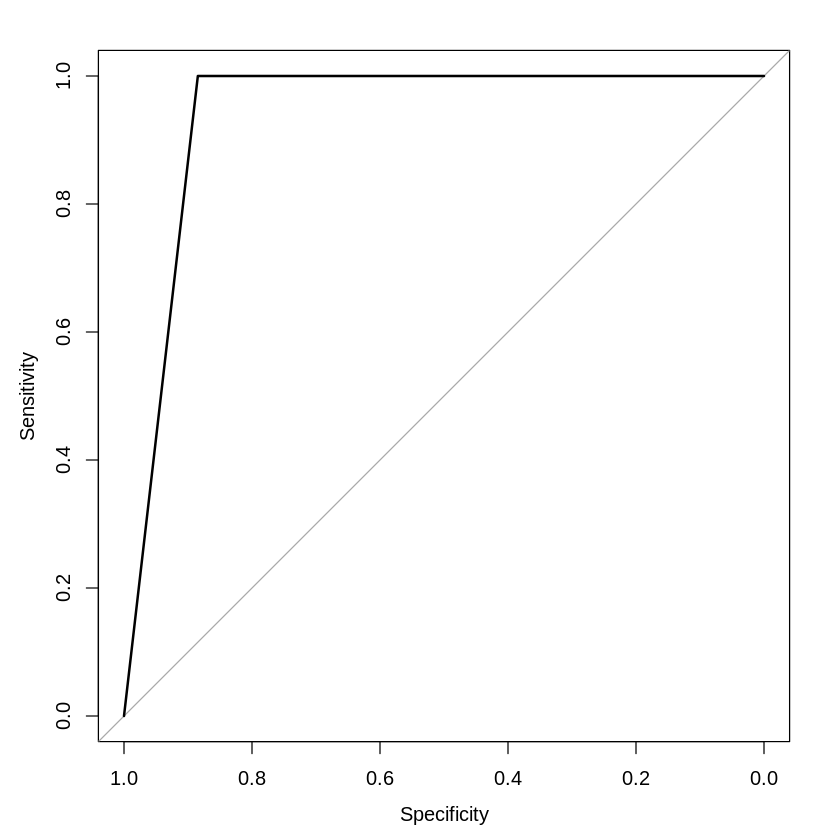

In [220]:
roc_svm_test <- roc(test_ans, svmmodel_test_ans_pred , plot = TRUE)
auc(roc_svm_test)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9423

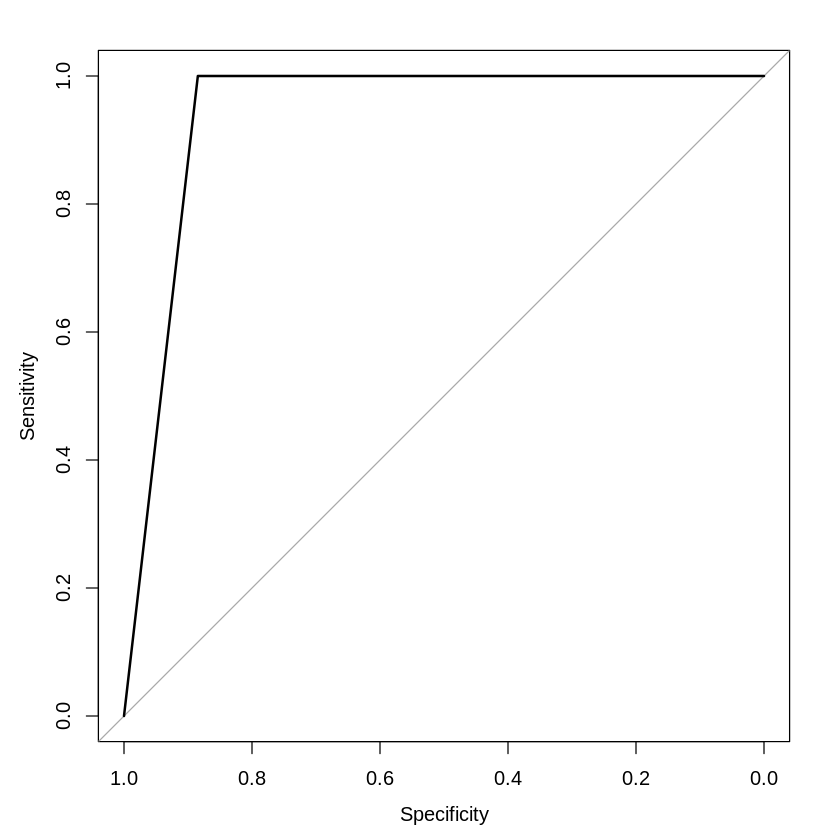

In [221]:
roc_nn_test <- roc(test_ans, nn_test_ans_pred , plot = TRUE)
auc(roc_nn_test)